This notebook analyzes the performance of different CBEs and Cas9 varieties.

In [35]:
#importing packages
import pandas as pd
from poola import core as pool
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import gpplot as gpp
from itertools import product

gpp.set_aesthetics()

In [36]:
NG_SpG = pd.read_excel("../../required_data/Cas9-NG/CBE benchmarking.xlsx", sheet_name='NG vs. SpG')
CBEs = pd.read_excel("../../required_data/Cas9-NG/CBE benchmarking.xlsx", sheet_name='CBEs')
TadCBEd = pd.read_excel("../../required_data/Cas9-NG/CBE benchmarking.xlsx", sheet_name='TadCBEd')

In [37]:
CBEs["Condition"].value_counts()

Condition
A549 flow         6
A549 Sanger       6
Meljuso flow      6
Meljuso Sanger    6
Name: count, dtype: int64

In [45]:
NG_SpG = NG_SpG[NG_SpG['Construct'].str.count('NIC')==0].reset_index(drop=True)#new line laura 

### Cas9-NG vs. Cas9-SpG + TadCBEd/APOBEC

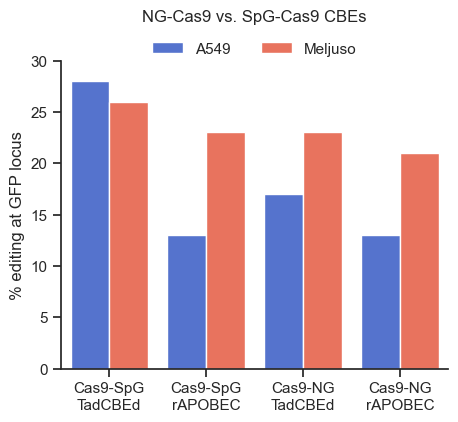

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(5,4)

colors = {'Meljuso':'tomato', "A549": 'royalblue'}
ax = sns.barplot(data=NG_SpG, x="Construct", y="GFP-", hue='Cell line', palette=colors)
ax.set_ylim(0,30)
ax.set_xticks(ticks=[0,1,2,3],
               labels=["Cas9-SpG\nTadCBEd",'Cas9-SpG\nrAPOBEC', "Cas9-NG\nTadCBEd",'Cas9-NG\nrAPOBEC'])
ax.set_ylabel("% editing at GFP locus")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 0.97), ncol=2, title='', frameon=False,
)

ax.set_xlabel("")
ax.set_title("NG-Cas9 vs. SpG-Cas9 CBEs",y=1.1)
sns.despine()

### CBE benchmarking

In [40]:
flow_only = CBEs[CBEs['Condition'].str.count('flow')>0].reset_index(drop=True)# new line laura 
flow_only.replace("A549 flow", "A549", inplace=True)
flow_only.replace("Meljuso flow", "Meljuso", inplace=True)

In [41]:
CBEs

,Construct,% GFP-,Condition
0,Liu CBE,19.400,A549 flow
1,Liu DE,14.700,A549 flow
2,Li CBE,11.500,A549 flow
3,Li CGBE,4.800,A549 flow
4,Gaudelli CBE,10.600,A549 flow
5,Gaudelli DE,11.800,A549 flow
6,Liu CBE,19.800,A549 Sanger
7,Liu DE,12.510,A549 Sanger
8,Li CBE,10.075,A549 Sanger
9,Li CGBE,14.375,A549 Sanger


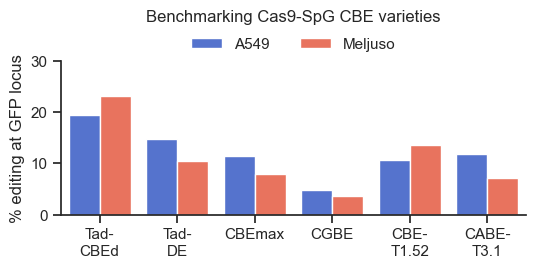

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(6,2)

colors = {'A549':'royalblue', 'Meljuso':'tomato'} 
ax = sns.barplot(data=flow_only, x="Construct", y="% GFP-", hue='Condition', palette=colors)
ax.set_ylim(0, 30)
ax.set_xticks(ticks=[0,1,2,3,4,5],
               labels=['Tad-\nCBEd','Tad-\nDE','CBEmax', "CGBE",'CBE-\nT1.52', 'CABE-\nT3.1'])
ax.set_ylabel("% editing at GFP locus")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 0.97), ncol=2, title='', frameon=False)

ax.set_xlabel("")
ax.set_title("Benchmarking Cas9-SpG CBE varieties",y=1.2)
sns.despine()